Predicting Election 2016
=======


## 1. Data Collection

### 1-A Twitter API

<img src=''></img>

### 1-B Extracting fields from json data

**Extracting Location:** 
```
Palm Beach Gardens, FL
Wisconsin, USA
Fishers, IN
```


### 1-C Storing Tweets into MySQL Database

**Filtering tweets based on**
 * Language `"lang":"en"`
 * Country `"country":"United States"`  
 * Not sensitive tweets `"possibly_sensitive":"false"`


```sql
mysql> create table ElectionTweets (id_str CHAR(18) PRIMARY KEY, month INT(2), day INT(2), loc_name VARCHAR(20), text VARCHAR(140));
Query OK, 0 rows affected (0.00 sec)

mysql> describe ElectionTweets;
+----------+--------------+------+-----+---------+-------+
| Field    | Type         | Null | Key | Default | Extra |
+----------+--------------+------+-----+---------+-------+
| id_str   | char(18)     | NO   | PRI | NULL    |       |
| month    | int(2)       | YES  |     | NULL    |       |
| day      | int(2)       | YES  |     | NULL    |       |
| loc_name | varchar(20)  | YES  |     | NULL    |       |
| text     | varchar(140) | YES  |     | NULL    |       |
+----------+--------------+------+-----+---------+-------+
5 rows in set (0.00 sec)

```

**Handling the time of tweets:**


## 2. Analysis

### Counting number of tweets in each state

```python
# function to read from database
def process_locations():
     conn = MySQLdb.connect (host = "localhost",
                             user = "USERNAME",
                             passwd = "PASSWORD",
                             db = "DATABASE")
     cursor = conn.cursor ()
     cursor.execute ("SELECT loc_name, count(*) as count FROM ElectionTweets GROUP BY loc_name;")

     state_dict = {}

     result_set = cursor.fetchall()
     for row in result_set:
         state_code = False
         loc_split = row[0].strip().split(' ')
         if (len(loc_split)==2):
             if (len(loc_split[1]) == 2): 
                 state_code = loc_split[1]

         if (state_code):
             if (state_code in state_dict):
                 state_dict[state_code] += int(row[1])
             else:
                 state_dict[state_code] = int(row[1])

     cursor.close ()
     conn.close ()

     return(state_dict)
```

## 3. Web-app

In [1]:
import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
import pandas

x1 = np.array(["H. Clinton", "B. Sanders"])
x2 = np.array(["D. Trump", "T. Cruz", "M. Rubio", "J. Kasick"])

y1 = np.array([46979, 31851])
y2 = np.array([196708, 52861, 55841, 13655])

print(y1, y2)

[46979 31851] [196708  52861  55841  13655]


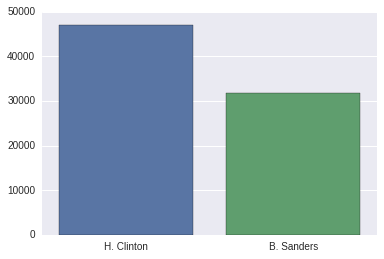

In [5]:
%matplotlib inline
sns.barplot(x=x1, y=y1)



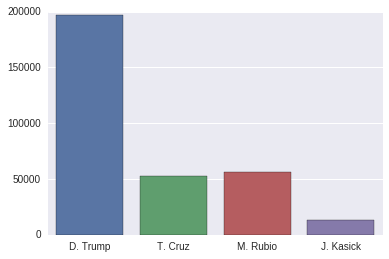

In [6]:
sns.barplot(x=x2, y=y2)